# Model's goal is to identify rotten and fresh apples.


In [ ]:
import os
!pip install -Uqq fastai duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 52.5 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term,max_images=100):

  """
  PARAMETERS:
  term = search term
  max_images = number of images to search || deafault 30
  """

  print(f"Searching for {term}")
  return L(DDGS().images(term, max_results=max_images)).itemgot('image') # Using the images method of the DDGS class


In [ ]:
# Checking for functionality

search = 'fresh apple'

urls = search_images(search,max_images=1)
urls[0]

search = 'rotten apple'
urls = search_images(search,max_images=1)
urls[0]



Searching for fresh apple
Searching for rotten apple


'https://media.istockphoto.com/photos/rotten-apple-picture-id519974059?k=6&m=519974059&s=170667a&w=0&h=kWlZwpZzSOoRazo1vexhJ6UAi78QBd7L21x-vi3McLY='

In [ ]:
type(urls) # fastcore.foundation.L

fastcore.foundation.L

In [ ]:
from fastdownload import download_url
# Downlaoding the images from the URL for inspection
dest = "inspect.jpg"
download_url(urls[0],dest,show_progress=False)


Path('inspect.jpg')

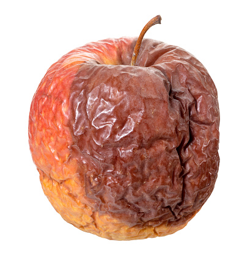

In [ ]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
# Inspecting for fresh apples
search_term = 'fresh apple'
dest ='fresh_apple_inspec.jpg'
fresh_apple_urls = search_images(search_term,max_images=1)
download_url(fresh_apple_urls[0],dest,show_progress=False)
Image.open(dest).to_thumb(256,256)

Searching for fresh apple


UnidentifiedImageError: cannot identify image file '/content/fresh_apple_inspec.jpg'

Searching for rotten apple


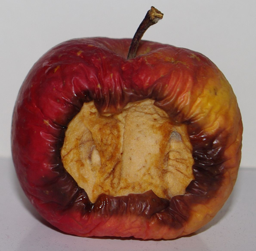

In [ ]:
# Inspecting for rotten apples
search_term = 'rotten apple'
dest = "rotten inspec.jpg"
fresh_apple_urls = search_images(search_term,max_images=1)
download_url(fresh_apple_urls[0],dest,show_progress=False)
Image.open(dest).to_thumb(256,256)

Searching for rotten apple


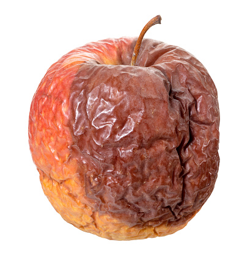

In [ ]:
# Inspecting for rotten apples
search_term = 'rotten apple'
dest = "rotten inspec1.jpg"
fresh_apple_urls = search_images(search_term,max_images=1)
download_url(fresh_apple_urls[0],dest,show_progress=False)
Image.open(dest).to_thumb(256,256)

In [ ]:
searches = 'fresh apple','rotten apple'

path = Path('apple_data')
from time import sleep
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest,urls=search_images(f'{o} photo'))

Searching for fresh apple photo
Searching for rotten apple photo


In [ ]:
# Checking for corrupted images and removing it

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

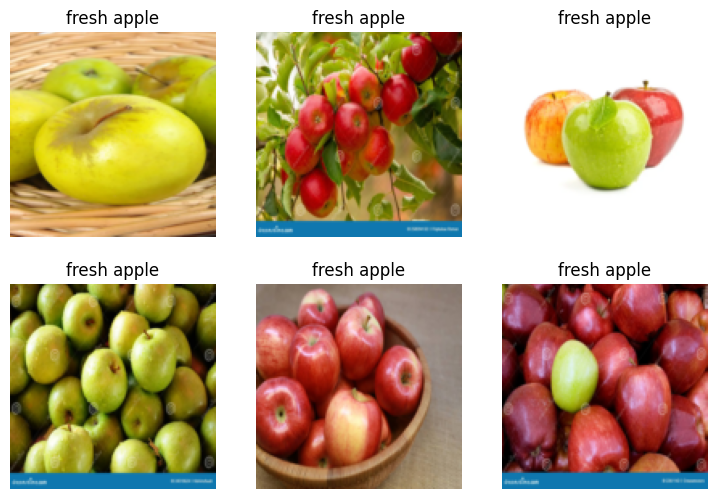

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128,method='squish')]
).dataloaders(path,bs=32)

# path = Path('apple data')
dls.show_batch(max_n=6) # DLS contain both raw and fresh apple

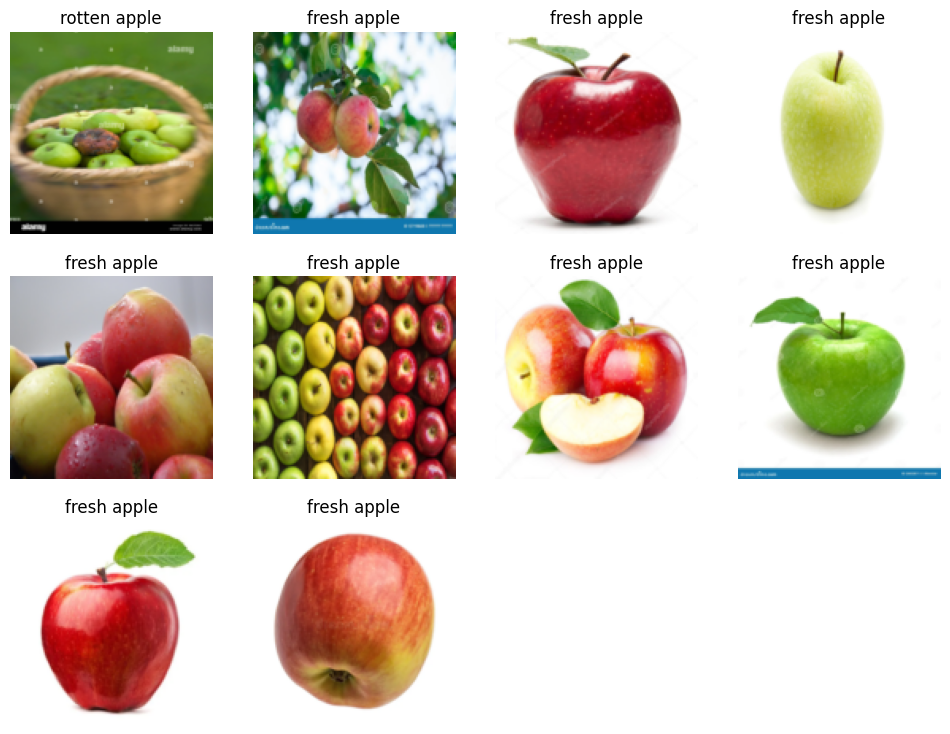

In [ ]:
dls.show_batch(max_n=10)

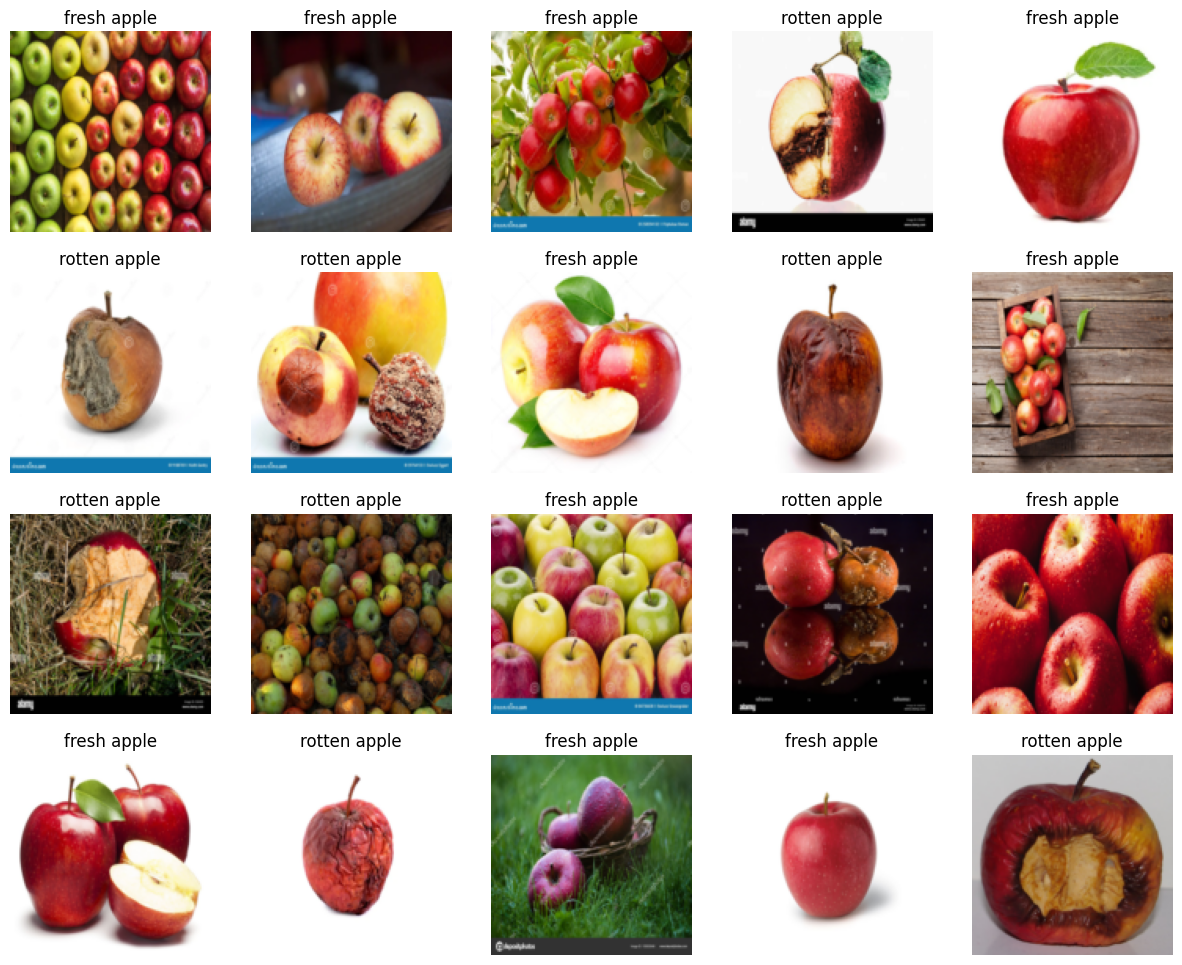

In [ ]:
dls.show_batch(max_n=20)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3) # resnet18 adjusts it's weight on this dataset

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.114537,1.240595,0.363636,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.426152,0.328886,0.121212,00:21
1,0.371246,0.239105,0.121212,00:20
2,0.275402,0.216373,0.121212,00:23


# Testing

In [ ]:
_apple,_,probs = learn.predict(PILImage.create("download.jpg"))
print(f"This is a: {_apple}.")
print(f"Probability it's a {_apple}: {probs[0]:.4f}")

This is a: fresh apple.
Probability it's a fresh apple: 0.9722


In [ ]:
_apple,_,probs = learn.predict(PILImage.create("download.jpg"))
print(f"This is a: {_apple}.")
print(f"Probability it's a {_apple}: {probs[0]:.4f}")

This is a: rotten apple.
Probability it's a rotten apple: 0.0061
